МФТИ ФИВТ: Курс Машинное Обучение (осень, 2016), Арсений Ашуха, ars.ashuha@gmail.com

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Hastie, The Elements of Statistical Learning, https://goo.gl/k3wfEU
    - 2.9 Model Selection and the Bias–Variance Tradeoff 
    - 15 Random Forests
- Соколов, Семинары по композиционным методам, https://goo.gl/sn8RyJ
- Andrew Ng, Bias vs. Variance, https://goo.gl/1ISZ6Y

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall <номер_группы> <фамилия>``, к примеру -- ``ML2016_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Какие формулы у шума, смещения, разброса? Какой смысл у этих компонент?

$$\underbrace{E_{x,y}(a^*(x) - y)^2}_{noise} + \underbrace{E_{x,y}(\overset{-}{a}(x) - a^*(x))^2}_{bias} +
\underbrace{E_{x,y}E_{X^l}(\mu(X^l)(x) - \overset{-}{a}(x))^2}_{variance}$$
<br>
Суть:
- шум - насколько сильно размеченные ответы отличаются от наиболее вероятных, т.е. тех, которые бы предсказывал лучший алгоритм
- смещение - насколько сильно сдвинуты ответы нашего алгоритма по сравнению с наиболее вероятными
- разброс - насколько сильно разбросаны друг от друга ответы нашего алгоритма

**Вопрос 2**: 4. Приведите пример семейства с маленьким смещением и большим разбросом. Приведите пример семейства с большим смещением и маленьким разбросом.

1. Решающие деревья
2. Линейные модели

**Вопрос 3**: Как сгенерировать подвыборку с помощью бутстрапа?

Применить метод выбора с возвращениями к начальной выборке.


**Вопрос 4**: Что такое бэггинг?

Метод обучения композиции алгоритмов, в котором каждый из алгоритмов обучается на своей подвыборке, сгенерированной с помощью бутстрапа; часто еще используется RSM. При этом ответ композиции алгоритмов определяется методом простого голосования.

**Вопрос 5**:  Как соотносятся смещение разброс композиции, построенной с помощью бэггинга, со смещением и разбросом одного базового алгоритма?

Смещение композиции совпадает со смещением базовых алгоритмов. Разброс композиции является суммой дисперсии ответов одного базового алгоритма и ковариации его ответов с ответами других базовых алгоритмов.

Т.е. $variance = \sum\limits_{t=1}^{T} \frac{1}{T} cov(b_T, b_t)$

**Вопрос 6**: Как обучается случайный лес? В чем отличия от обычной процедуры построения решающих деревьев?

Используются бэггинг и RSM: каждое дерево обучается на своей подвыборке. После этого ответы усредняются. Для оценки качества композиции используется out-of-bag score.

**Вопрос 7**: Почему хорошими базовыми алгоритмами для бэггинга являются именно деревья?

Потому что у них низкое смещение, эта модель достаточно гибкая и может хорошо фитить данные, а усреднение ответов и бэггинг делают разброс композиции меньше.

**Вопрос 8**: Как оценить качество случайного леса с помощью out-of-bag-процедуры?

Для каждого дерева мы знаем множество элементов, на которых оно обучалось (выбранных с помощью бустрапа). Для каждого элемента трейна возьмем те деревья, которые не использовали его при своем обучении. Посчитаем ответ композиции для этого элемента, используя только эти деревья. Это и будет out-of-bag score для данного элемента. Дальше просто сложим эти значения для всех элементов трейна.

-----------
PS: Если проверяющий не понял ответ на большинство вопросов, то будет пичалька. Пишите так, чтобы можно было разобраться. 

<h1 align="center">Bagging</h1> 

Известно, что бэггинг плохо работает, если в качестве базовых классификаторов взять knn. Попробуем понять причины на простом примере.

Пусть дана выборка $X^l$ из $l$ объектов с ответами из множества $Y = \{−1, +1\}$. Будем рассматривать классификатор одного ближайшего соседа в качестве базового алгоритма. Построим с помощью бэггинга композицию длины $N$:

$$a_N(x) = sign(\sum_{n=1}^{N} b_n(x))$$

Оцените вероятность того, что ответ композиции на произвольном объекте x будет
отличаться от ответа одного классификатора ближайшего соседа, обученного по всей
выборке. Покажите, что эта вероятность стремится к нулю при N → ∞.

-----
Пусть у нас есть вокруг объекта $x~k$ ближайших соседей с таким же классом, как и ближайший к $x$ сосед. БОО пусть это класс +1. <br>
Тогда тот факт, что композиция дает ответ -1, говорит о том, что среди $N$ алгоритмов есть хотя бы $\left\lceil\frac{N + 1}{2}\right\rceil$ таких, которые дают ответ -1.

Будем при оценке считать, что каждый объект попадает в выборку, генерируемую бустрапом, с вероятностью $p. ~ (0 < p < 1)$ <br>
Тогда вероятность того, что ответы композиции и 1-NN отличаются, равна 
$((1 - p)^k)^\left\lceil\frac{N + 1}{2}\right\rceil$, что очевидно стремится к 0 при $N \to \infty$


<h1 align="center">Bagging Implementation</h1> 

Реализуйте беггинг.

In [1]:
import warnings

import numpy as np
from copy import deepcopy
from sklearn.base import ClassifierMixin, BaseEstimator

warnings.simplefilter("ignore")


class BaggingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_estimator, n_estimators, items_rate=1.0, features_rate=1.0):
        """
        Parameters
        ----------
        base_estimator: sklearn.Classifier
            Базовый алгоритм, который можно обучить (есть метод fit).
            Для обучение композиции нужно много таких, можэно получить с помощю copy.deepcopy

        n_estimators: int
            Число алгоритмов в композиции

        items_rate: float > 0
            Доля объектов из трейна, на которой будет обучаться каждый базовый алгоритм

        features_rate: float > 0
            Доля фичей, на которой будет обучаться и применяться каждый базовый алгоритм
        """
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.items_rate = items_rate
        self.features_rate = features_rate

    def fit(self, X, y):
        """
        Метод должен обучить композицию алгоритмов, используя X, y как обучающую выборку.
        Не забудте реализорвать функционал выбора случайных объектов и фичей.

        Parameters
        ----------
        X: 2d np.array
        y: 1d np.array
        """
        
        n_features =  int(X.shape[1] * self.features_rate)
        n_samples = int(X.shape[0] * self.items_rate)
        
        # Тут храните фичи для каждого алгоритма
        self.features_idx = []
        
        # Тут храните обеченные базовые алгоритмы
        self.estimators = []
        
        for i in range(self.n_estimators):
            cur_features = np.random.choice(np.arange(X_train.shape[1]), size=n_features, replace=False)
            self.features_idx.append(cur_features)
            estimator = deepcopy(self.base_estimator)
            # =======================================
            # Обучите базовые алгоритмы
            # =======================================
            samples_idx = np.random.random_integers(0, high=X.shape[0] - 1, size=n_samples)
            estimator.fit(X[np.ix_(samples_idx, cur_features)], y[samples_idx])
            self.estimators.append(estimator)
            
        return self

    def predict(self, X):
        """

        Parameters
        ----------
        X: 2d np.array матрица объекты признаки на которых нужно сказать ответ

        Returns
        -------
        y_pred: 1d np.array, Вектор классов для каждого объекта
        """
        
        probs = [] # Храните тут ответы каждого базового алгоритма 
        
        for i in range(self.n_estimators):
            # =======================================
            # Получите ответы (вероятности) от всех базовых алгоритмов
            # ======================================
            cur_pred = self.estimators[i].predict_proba(X[:, self.features_idx[i]])
            probs.append(cur_pred)
            
        # =======================================
        # Усредните вероятности полученные от базовых алгоритмов
        # =======================================
        y_pred = np.mean(probs, axis=0)
        y_pred = np.argmax(y_pred, axis=1)
        return y_pred

### Titanic Test

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

titanic = pd.read_csv('./data/train.csv')[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

sex_encoder = LabelEncoder()
titanic.Sex = sex_encoder.fit_transform(titanic.Sex)
features = ['Pclass', 'Sex', 'Age', 'Fare']

In [3]:
X, y = titanic[features].values, titanic.Survived.values
X = np.nan_to_num(X)
X_train, y_train, X_test, y_test = X[:500], y[:500], X[500:], y[500:]

Нужно обучить свой беггинг на датасете титаник, и посмотреть работает ли он. 

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [5]:
# =======================================
# Обучите беггинг над DecisionTreeClassifier с 10 моделями
# =======================================
clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10, items_rate=0.6, features_rate=.75)
clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         features_rate=0.75, items_rate=0.6, n_estimators=10)

In [6]:
print accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)

0.93 0.790281329923


Проведите эксперименты:
    - Работает-ли беггинг лучше чем просто линейная модель?
    - Какой items_rate и features_rate работает лучше и почему?

In [7]:
from sklearn.grid_search import GridSearchCV

In [8]:
grid_searcher = GridSearchCV(clf, scoring='accuracy', iid=False, cv=3, verbose=1, n_jobs=4,
                 param_grid={'items_rate':[0.1 * i for i in range(1,10)], 'features_rate':[0.25 * i for i in range(1,5)]})
grid_searcher.fit(X_train, y_train)
print 'best params: %s,\nprediction accuracy: %s' % (
    grid_searcher.best_params_, accuracy_score(grid_searcher.best_estimator_.predict(X_test), y_test))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
best params: {'items_rate': 0.4, 'features_rate': 0.75},
prediction accuracy: 0.815856777494


[Parallel(n_jobs=4)]: Done 108 out of 108 | elapsed:    0.8s finished


In [9]:
grid_searcher.grid_scores_

[mean: 0.69614, std: 0.05302, params: {'items_rate': 0.1, 'features_rate': 0.25},
 mean: 0.71008, std: 0.01853, params: {'items_rate': 0.2, 'features_rate': 0.25},
 mean: 0.69624, std: 0.05587, params: {'items_rate': 0.30000000000000004, 'features_rate': 0.25},
 mean: 0.69019, std: 0.03764, params: {'items_rate': 0.4, 'features_rate': 0.25},
 mean: 0.65402, std: 0.01050, params: {'items_rate': 0.5, 'features_rate': 0.25},
 mean: 0.71605, std: 0.04052, params: {'items_rate': 0.6000000000000001, 'features_rate': 0.25},
 mean: 0.65402, std: 0.02487, params: {'items_rate': 0.7000000000000001, 'features_rate': 0.25},
 mean: 0.72433, std: 0.06473, params: {'items_rate': 0.8, 'features_rate': 0.25},
 mean: 0.70609, std: 0.01815, params: {'items_rate': 0.9, 'features_rate': 0.25},
 mean: 0.75423, std: 0.04087, params: {'items_rate': 0.1, 'features_rate': 0.5},
 mean: 0.66236, std: 0.07181, params: {'items_rate': 0.2, 'features_rate': 0.5},
 mean: 0.74443, std: 0.07796, params: {'items_rate': 0

На самом деле, тут еще несколько влияет то, что каждый раз разный random_state. Поэтому за лучшие параметры я буду считать те, где минимальное std при более-менее высокой средней точности.

Т.е. как раз $params: {'items\_rate': 0.4, 'features\_rate': 0.75}$

Такой features_rate наилучший, т.к. фич достаточно мало и наиболее информативным будет брать их почти все для каждого дерева.

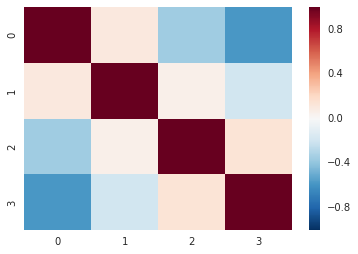

In [10]:
corr_matrix = np.zeros((4,4))
for i in range(4):
    for j in range(4):
        corr_matrix[i][j] = np.corrcoef(X_train[:,i], X_train[:,j])[0,1]
from seaborn import heatmap
%matplotlib inline
heatmap(corr_matrix)

Как видно, большая часть фичей мало кореллируют. Это еще одно объяснение того, почему наилучший features_rate равен 0.75.

In [11]:
# =======================================
# Обучите беггинг над DecisionTreeClassifier с 100 моделями
# =======================================
clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, items_rate=0.6, features_rate=.75)
clf.fit(X_train, y_train)
acc = accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)
print acc

(0.93400000000000005, 0.82352941176470584)


In [12]:
# =======================================
# Обучите LogsiticRegression 
# =======================================
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
print accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)

0.8 0.769820971867


Линейная модель работает хуже, т.к. у нее явно большее смещение. К тому же, мы имеем сравнительно мало данных для обучения. Она является очень негибкой, т.к. всего 5 фичей

### Adult Test

In [13]:
adult = pd.read_csv(
    './data/adult.data', 
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"], 
    header=None, na_values="?")

adult = pd.get_dummies(adult)
adult["Target"] = adult["Target_ >50K"]
X, y = adult[adult.columns[:-3]].values, adult[adult.columns[-1]].values
X_train, y_train, X_test, y_test = X[:20000], y[:20000], X[20000:], y[20000:]

Ответте на вопросы:
    - Работает-ли беггинг лучше чем просто линейная модель?
    - Какой items_rate и features_rate работает лучше и почему?

In [14]:
clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10, items_rate=0.6, features_rate=1.)
grid_searcher = GridSearchCV(clf, scoring='accuracy', iid=False, cv=3, verbose=1, n_jobs=4,
                 param_grid={'items_rate':[0.1 * i for i in range(1,10)], 'features_rate':[0.1 * i for i in range(1,11)]})
grid_searcher.fit(X_train, y_train)
print ('best params: %s,\nprediction accuracy: %s' % (
    grid_searcher.best_params_, accuracy_score(grid_searcher.best_estimator_.predict(X_test), y_test)))

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   39.3s
[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed:  1.2min finished


best params: {'items_rate': 0.6000000000000001, 'features_rate': 0.9},
prediction accuracy: 0.851524560146


Опять же посмотрев на grid\_searcher.grid\_score_ за лучшие параметры возьму 
$params: {'items\_rate': 0.6, 'features\_rate': 0.9}$

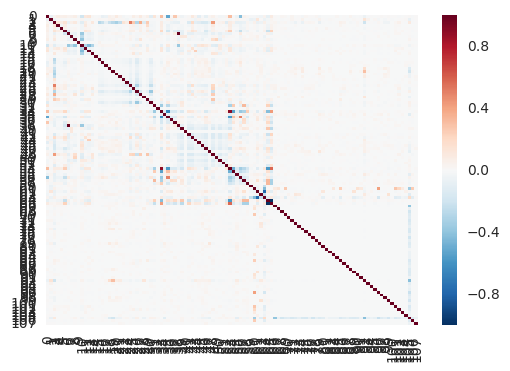

In [15]:
corr_matrix = np.zeros((X_train.shape[1],X_train.shape[1]))
for i in range(X_train.shape[1]):
    for j in range(X_train.shape[1]):
        corr_matrix[i][j] = np.corrcoef(X_train[:,i], X_train[:,j])[0,1]
heatmap(corr_matrix)

Опять же в большинстве своем фичи не кореллируют

In [17]:
clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10, items_rate=0.4, features_rate=.7)
clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         features_rate=0.7, items_rate=0.4, n_estimators=10)

In [18]:
accuracy_score(clf.predict(X_test), y_test)

0.85160417164238511

In [19]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
print accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)

0.79975 0.794920786562


Опять же линейная модель работает хуже.

<h1 align="center">Text, Image Classification</h1> 

Дальше в каждом эксперименте нужно: 
- сравниться с линейной моделью ( какую лучше выбрать?=) )
- сделать выбор в пользу одной из моделей
- выбор обосновать, почему одна из моделей хуже а другая лучше
- что такое хуже и лучше
- попробуйте беггинг над деревьями и линейными моделями 
- почему работает или не работает, какие особенности данных на это влияют

### Text classification

In [20]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

vectorizer = TfidfVectorizer()
X_train, y_train = vectorizer.fit_transform(newsgroups_train.data), newsgroups_train.target
X_test,  y_test  = vectorizer.transform(newsgroups_test.data), newsgroups_test.target

In [24]:
%%time
# =======================================
# Обучите Линейную модель 
# =======================================
from sklearn.linear_model import LogisticRegression # линейная модель для классификации

clf = LogisticRegression()
clf.fit(X_train, y_train)
print (accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test))

(0.96986035000883863, 0.82793414763674988)
CPU times: user 33.3 s, sys: 1.62 s, total: 34.9 s
Wall time: 8.76 s


In [25]:
%%time
# =======================================
# Обучите беггинг над DecisionTreeClassifier
# =======================================

clf = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=10, items_rate=0.4, features_rate=.7)
clf.fit(X_train, y_train)
print (accuracy_score(clf.predict(X_train[:100]), y_train[:100]), accuracy_score(clf.predict(X_test), y_test))

(0.93841094098235373, 0.64468233078281511)
CPU times: user 6min 50s, sys: 14.7 s, total: 7min 5s
Wall time: 7min 5s


In [27]:
%%time

clf = BaggingClassifier(LogisticRegression(), n_estimators=10, items_rate=0.4, features_rate=.7)
clf.fit(X_train, y_train)
print (accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test))

(0.92370514406929465, 0.80329261816250668)
CPU times: user 7min 48s, sys: 17.5 s, total: 8min 6s
Wall time: 7min 16s


Как видим в данном случае все наоборот: регрессия работает лучше. Это происходит потому, что разброс у нее меньше, а в силу того, что имеется огромное количество фич, модель для регрессии становится достаточно гибкой, что дает ей сделать смещение очень маленьким

Теперь о том, почему не работает бэггинг для линейных моделей. Во-первых, мы берем не все фичи - что значительно ухудшает их качество -, во-вторых, т.к. мы работаем с текстовыми данными, мы можем часто не брать в подвыборку данные по словам, которые встречаются редко

### Image classification

In [28]:
from utils import load_cifar10
X_train, y_train, X_val, y_val, X_test, y_test = load_cifar10('./data/cifar10')[0]

In [29]:
X_train, X_test = X_train.reshape(X_train.shape[0], -1), X_test.reshape(X_test.shape[0], -1)

In [30]:
X_train.shape

(50000, 3072)

In [38]:
%%time
# =======================================
# Обучите Линейную модель 
# ======================================
clf = LogisticRegression(verbose=1, n_jobs=6)
clf.fit(X_train[:2000], y_train[:2000])

[LibLinear]CPU times: user 4min 37s, sys: 9.05 ms, total: 4min 37s
Wall time: 4min 37s


In [39]:
accuracy_score(clf.predict(X_test), y_test)

0.18690000000000001

Хочу заметить, что алгоритм на полном датасете будет обучаться достаточно долго - это, если учесть, что я считаю на AWS.

In [40]:
%%time
# =======================================
# Обучите беггинг над DecisionTreeClassifier
# =======================================
clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10, items_rate=0.2, features_rate=.7)
clf.fit(X_train, y_train)

CPU times: user 6min 39s, sys: 1.32 s, total: 6min 41s
Wall time: 6min 41s


In [42]:
print (accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test))

(0.91230000000000001, 0.28559999999999999)


Что линейная модель, что решающие деревья плохо учитывают зависимость между соседними пикселями. Соответственно они плохи в классификации изображений. К тому же, хочется сказать, что для обучения при распознавании изображений лучше использовать все фичи, а не часть (как мы делаем в бэггинге)

<h1 align="center">Random Forest Feature Impotance</h1> 

Опишите как вычисляется важность фичей в дереве, можите изучить как работает  feature\_importances_ в sklearn.

---

Есть несколько вариантов. Один из них следующий: возьмем произвольную фичу, посмотрим на то, в каких вершинах у каких деревьев происходит разделение по этой фиче, и усредним изменение энтропии с весами равными вероятностям дойти до этих вершин.
Смысл примерно следующий: чем лучше конкретная фича разделяет датасет, чем ближе она находится к корню дерева, тем больше ее важность.

Почитайте Feature Impotance для Adult и Titanic (используйте полный датасет), ПРОИНТЕРПРЕТИРУЙТЕ резульататы.

In [61]:
titanic = pd.read_csv('./data/train.csv')[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Parch', 'Embarked']]

sex_encoder = LabelEncoder()
titanic.Sex = sex_encoder.fit_transform(titanic.Sex)
parch_encoder = LabelEncoder()
titanic.Parch = parch_encoder.fit_transform(titanic.Parch)
embarked_encoder = LabelEncoder()
titanic.Embarked = embarked_encoder.fit_transform(titanic.Embarked)
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Parch', 'Embarked']

In [62]:
X, y = titanic[features].values, titanic.Survived.values
X = np.nan_to_num(X)

In [64]:
X_train = X
y_train = y

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
clf = RandomForestClassifier(n_jobs=6, n_estimators=100, verbose=1)
clf.fit(X, y)

[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=6,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [68]:
[(clf.feature_importances_[i], features[i]) for i in range(6)]

[(0.095733055966993899, 'Pclass'),
 (0.26340715907293322, 'Sex'),
 (0.25427769115539112, 'Age'),
 (0.30544836332410769, 'Fare'),
 (0.046631101788886117, 'Parch'),
 (0.034502628691688013, 'Embarked')]

Можно заметить, что больше всего влияют три признака: пол, возраст и плата за билет

### Adult

In [69]:
X, y = adult[adult.columns[:-3]].values, adult[adult.columns[-1]].values
X_train, y_train, X_test, y_test = X[:20000], y[:20000], X[20000:], y[20000:]

In [70]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, 
                        items_rate=1, features_rate=1).fit(X_train, y_train)

In [73]:
# =======================================
# Посчитайте feature_importances для clf
# =======================================

result = np.zeros(X_train.shape[1])
for i in range(100):
    tree = clf.estimators[i]
    features = clf.features_idx[i]
    importances = tree.feature_importances_
    result[features] += importances

In [75]:
result /= 100

In [76]:
result

array([ 0.11382,  0.16594, ...,  0.00024,  0.00062])

### Titanic

In [77]:
titanic = pd.read_csv('./data/train.csv')[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Parch', 'Embarked']]

sex_encoder = LabelEncoder()
titanic.Sex = sex_encoder.fit_transform(titanic.Sex)
parch_encoder = LabelEncoder()
titanic.Parch = parch_encoder.fit_transform(titanic.Parch)
embarked_encoder = LabelEncoder()
titanic.Embarked = embarked_encoder.fit_transform(titanic.Embarked)
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Parch', 'Embarked']

In [78]:
X, y = titanic[features].values, titanic.Survived.values
X = np.nan_to_num(X)
X_train, y_train, X_test, y_test = X[:500], y[:500], X[500:], y[500:]
# не совсем понятно, что имелось ввиду под "используйте полный датасет", если тут мы за трейн берем всего 500 сэмплов

In [79]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, 
                        items_rate=1, features_rate=1).fit(X_train, y_train)

In [80]:
# =======================================
# Посчитайте feature_importances для clf
# =======================================

result = np.zeros(X_train.shape[1])
for i in range(100):
    tree = clf.estimators[i]
    features_idx = clf.features_idx[i]
    importances = tree.feature_importances_
    result[features_idx] += importances
result /= 100

In [81]:
[(result[i], features[i]) for i in range(6)]

[(0.080747638678022551, 'Pclass'),
 (0.33654205935046322, 'Sex'),
 (0.23059698722108929, 'Age'),
 (0.28299719723062045, 'Fare'),
 (0.028509520180857312, 'Parch'),
 (0.040606597338947073, 'Embarked')]

Как видим, в целом картина та же, что и в нормальном методе sklearn-а. Нужно еще учесть, что есть некая рандомизация в построении деревьев, и я усреднял важности фич с единичными весами